# K-Means in NumPy

A basic NumPy implementation and simple examples of using K-Means clustering.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as spdist
from sklearn import metrics

import matplotlib
matplotlib.rcParams['figure.figsize'] = (9, 8)

Our sample dataset consists of three true clusters that are drawn from two-dimensional random normal distributions.

In [2]:
n = 75, 100, 150

c0 = np.vstack((
        np.random.normal(loc=4.0, size=n[0]),
        np.random.normal(loc=0.0, size=n[0]))).T

c1 = np.vstack((
        np.random.normal(loc=-3.0, size=n[1]),
        np.random.normal(loc=-3.0, size=n[1]))).T

c2 = np.vstack((
        np.random.normal(loc=0.0, size=n[2]),
        np.random.normal(loc=-4.0, size=n[2]))).T

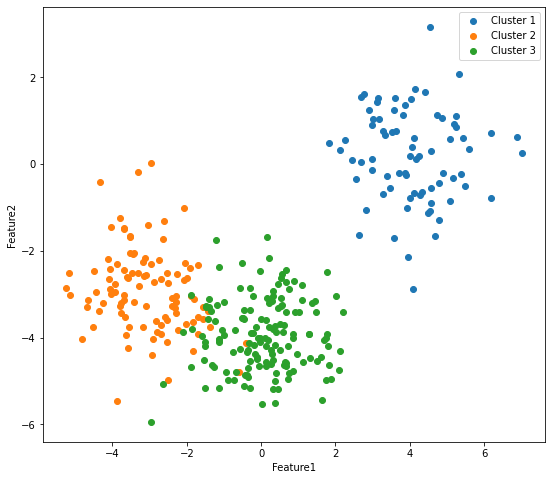

In [3]:
plt.scatter(*c0.T, label='Cluster 1');
plt.scatter(*c1.T, label='Cluster 2');
plt.scatter(*c2.T, label='Cluster 3');
plt.xlabel('Feature1');
plt.ylabel('Feature2');
plt.legend();

In [4]:
c = np.vstack((c0, c1, c2))
c.shape

(325, 2)

The algorithm will not, however, know the true clusters.  Instead, it must infer them from only the combined data.

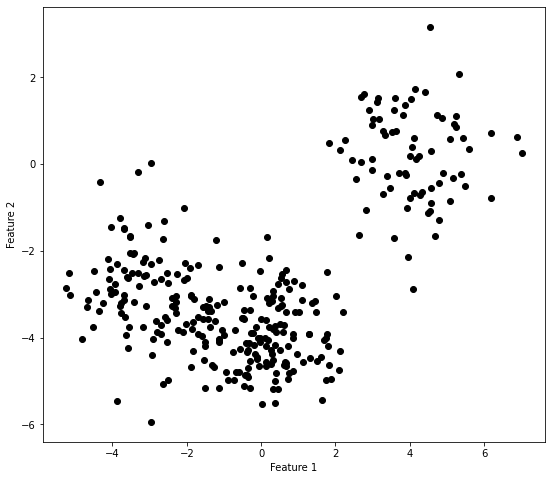

In [5]:
plt.scatter(*c.T, color='black');
plt.xlabel('Feature 1');
plt.ylabel('Feature 2');

## NumPy implementation

In [6]:
class KMeans:
    '''K-Means Clustering.
    '''
    def __init__(self, x, k, maxiter=20):
        '''Train a new K-Means clustering model.
        
        Args:
            x: np.array((nobs, ndim))
                Array of floating point training observations.
            k: int
                Number of clusters to find.
            maxiter: int
                Number of training iterations to perform.
        '''
        self.k = k
        
        # initial centroids are just randomly chosen training observations
        init_idx = np.random.permutation(x.shape[0])[:k]
        self.centroids = x[init_idx].copy()

        # for each training iteration
        for it in range(maxiter):           
            # compute the index to the nearest centroid for each training observation
            nearest_idxs = self.label(x)

            # update each centroid to be the mean of the training observations
            # for which the current centroid was closest
            for centroid_idx in range(k):
                self.centroids[centroid_idx] = x[nearest_idxs == centroid_idx].mean(axis=0)
                
    def label(self, x):
        '''Assign integer cluster labels to the observations in `x`.
        '''
        # compute the distance between each centroid and each observation
        dist = spdist.cdist(self.centroids, x, metric='euclidean')
        
        # return the index of the centroid nearest to each observation
        return np.argmin(dist, axis=0)
    
    def cluster(self, x):
        '''Group `x` into a list of length `k` where each element is an array
        containing the observations assigned to the corresponding cluster.
        '''
        # assign cluster labels to the observations
        labels = self.label(x)
        
        # group the observations by their predicted label
        return [x[labels == cluster_idx] for cluster_idx in range(self.k)]
    
    def score(self, x, true_labels):
        '''Find the adjusted mutual information score for `x` given a list
        of true integer labels, `true_labels`.
        '''
        pred_labels = self.label(x)
        return metrics.adjusted_mutual_info_score(
            true_labels, pred_labels, average_method='arithmetic')

## Evaluating the model

In [7]:
kmeans = KMeans(c, k=3)
pred_labels = kmeans.label(c)
pred_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
true_labels = np.array(sum(([label]*count for label, count in enumerate(n)), []))
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [9]:
clusters = kmeans.cluster(c)
[cluster.shape for cluster in clusters]

[(139, 2), (111, 2), (75, 2)]

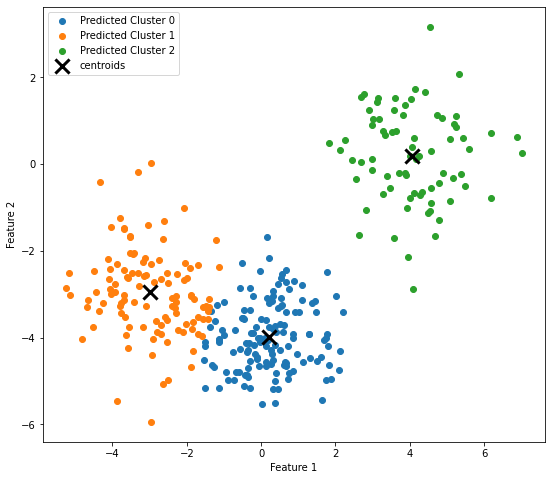

In [10]:
for i, cluster in enumerate(clusters):
    plt.scatter(*cluster.T, label=f'Predicted Cluster {i}')

plt.scatter(*kmeans.centroids.T, marker='x', color='black', s=200, linewidth=3, label='centroids');
plt.xlabel('Feature 1');
plt.ylabel('Feature 2');
plt.legend();

In [11]:
kmeans.score(c, true_labels)

0.8303780799393906

## More or fewer clusters

0.6808655246834943

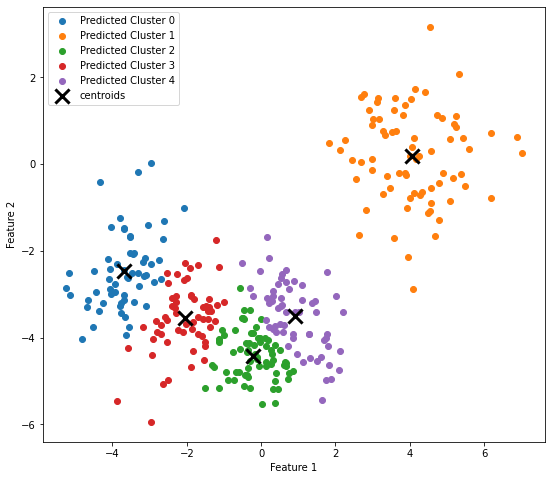

In [12]:
kmeans = KMeans(c, k=5)
clusters = kmeans.cluster(c)

for i, cluster in enumerate(clusters):
    plt.scatter(*cluster.T, label=f'Predicted Cluster {i}')

plt.scatter(*kmeans.centroids.T, marker='x', color='black', s=200, linewidth=3, label='centroids');
plt.xlabel('Feature 1');
plt.ylabel('Feature 2');
plt.legend();

kmeans.score(c, true_labels)

0.6747882553807778

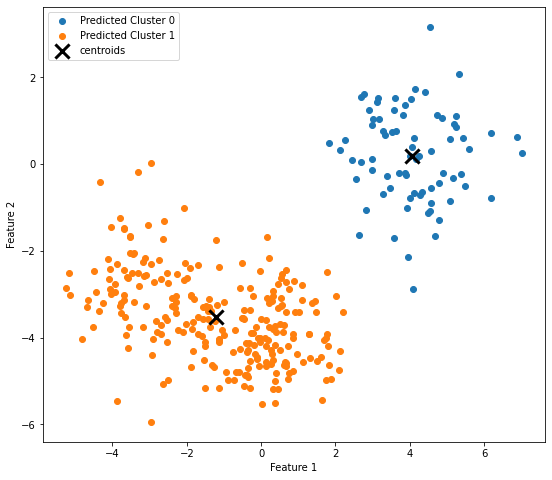

In [13]:
kmeans = KMeans(c, k=2)
clusters = kmeans.cluster(c)

for i, cluster in enumerate(clusters):
    plt.scatter(*cluster.T, label=f'Predicted Cluster {i}')

plt.scatter(*kmeans.centroids.T, marker='x', color='black', s=200, linewidth=3, label='centroids');
plt.xlabel('Feature 1');
plt.ylabel('Feature 2');
plt.legend();

kmeans.score(c, true_labels)